<a href="https://colab.research.google.com/github/marclamberts/football-analysis/blob/main/P_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

# Provide the file path
file_path = '/content/drive/My Drive/Database Men 2023-2024/Eredivisie - 2023-2024.xlsx'  # Replace with your file path

# Load the data
df = pd.read_excel(file_path)  # Directly load the first sheet or default sheet
df.head()


,Player,Team,Team within selected timeframe,Position,Age,Matches played,Minutes played,Goals,xG,Assists,...,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 90.1,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %"
0,J. Hato,Ajax,Ajax,"LCB, LB",18.0,33,3274,1,1.26,1,...,NaN,3.35,NaN,NaN,0.0,0.0,0.0,0.0,0,0.0
1,E. Room,Vitesse,Vitesse,GK,35.0,33,3253,0,0.00,0,...,-0.048,0.03,0.44,0.11,NaN,NaN,NaN,0.0,0,0.0
2,M. Brouwer,Heracles,Heracles,GK,31.0,33,3252,0,0.00,1,...,0.032,0.03,1.85,0.36,NaN,NaN,NaN,0.0,0,0.0
3,J. de Lange,Go Ahead Eagles,Go Ahead Eagles,GK,26.0,33,3230,0,0.00,0,...,0.061,0.00,0.78,0.28,NaN,NaN,NaN,0.0,0,0.0
4,N. Olij,Sparta Rotterdam,Sparta Rotterdam,GK,28.0,33,3228,0,0.00,0,...,0.071,0.00,1.56,0.33,NaN,NaN,NaN,0.0,0,0.0


In [5]:
from scipy.stats import pearsonr

# Calculate Goal Contributions (G+A)
df['GoalContributions'] = df['Goals'] + df['Assists']  # Replace with actual column names

# Filter relevant columns
analysis_data = df[['Minutes played', 'GoalContributions']].dropna()

# Extract data
minutes_played = analysis_data['Minutes played']
goal_contributions = analysis_data['GoalContributions']

# Perform Pearson correlation test
correlation, p_value = pearsonr(minutes_played, goal_contributions)

# Display results
print(f"Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")


Correlation Coefficient: 0.4533650131208822
P-value: 1.0264167189051406e-26


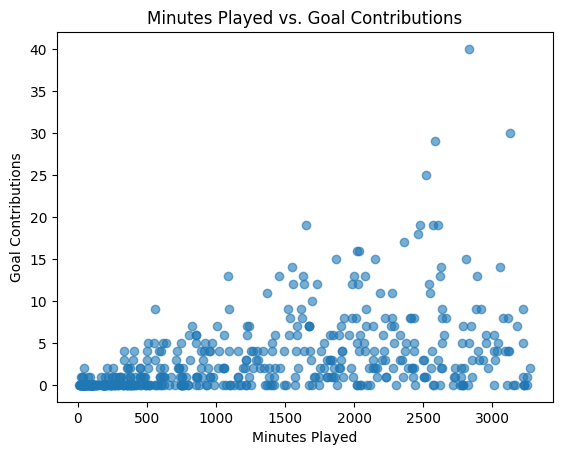

In [6]:
import matplotlib.pyplot as plt

plt.scatter(minutes_played, goal_contributions, alpha=0.6)
plt.title('Minutes Played vs. Goal Contributions')
plt.xlabel('Minutes Played')
plt.ylabel('Goal Contributions')
plt.show()
